In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
import pathlib 
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

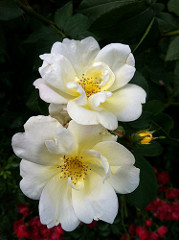

In [7]:
PIL.Image.open(str(roses[0]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
X = np.array(X)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.3148 - loss: 1.7053
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.5744 - loss: 1.0776
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.6719 - loss: 0.8432
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.7491 - loss: 0.6661
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.8157 - loss: 0.5020
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.8938 - loss: 0.3253
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.9441 - loss: 0.1935
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.9709 - loss: 0.0926
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9943 - loss: 0.0356
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.9966 - loss: 0.0220
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9937 - loss: 0.0352
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 11

In [26]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6788 - loss: 2.1504


[2.1667087078094482, 0.6655773520469666]

In [28]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


array([[ -1.2743785,  15.800807 ,   3.916619 , -26.19611  ,  -9.62923  ],
       [  6.9928966,  -4.2522316, -12.550818 ,  -9.167134 ,   2.5859203],
       [ -9.139921 ,   2.2894335,  14.242008 ,  -6.0161576,  -6.809476 ],
       ...,
       [  5.3014355, -12.571808 , -13.126047 ,   3.627926 ,   1.7061615],
       [ -0.8760114,   5.8138514,  -6.5853844,  -9.904658 ,  -2.168341 ],
       [  1.4858305, -18.748232 ,   4.3720293,  11.241227 ,   6.3772197]],
      dtype=float32)

In [29]:
#data augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'